# SCENARIOS CLIMATIQUES - PROJECTIONS GIEC

# Traitement des séries temporelles pour intégration modèle géothermique

## Import des données issues des Simulations climatiques – DRIAS-2020 – CNRM-CM5 / ALADIN63

Source DRIAS - Ministère de la transition écologique: ce groupe a pour vocation de mettre à disposition des projections climatiques régionalisées réalisées dans les laboratoires français de modélisation du climat (IPSL, CERFACS, CNRM).
Site source: https://drias-prod.meteo.fr/okapi/accueil/okapiWebDrias/index.jsp

### Données station Météo-France Mérignac période 2019-04-01 / 2021-04-22
- Température journalière moyenne

### Scénarios analysés:
- Scénario d’émission REF à l’horizon 1951-2005: scénario référence actuel 
- Scénario d’émission RCP2.6 à l’horizon 2071-2100: Émissions maîtrisées 
- Scénario d’émission RCP4.5 à l’horizon 2071-2100: Émissions modérées
- Scénario d’émission RCP8.5 à l’horizon 2071-2100: Émissions non réduites 

## Exemple en-tête du fichier d'import DRIAS (scénario de référence)
 Origine : DRIAS-CLIMAT - http://www.drias-climat.fr/commande  (produit par 'nc2txt_drias2020 1.2 du 12.07.2021')
 Date d'extraction : 08/12/2021 05:27:59 UTC
 Production : eurocordex2020
 Modele : CNRM-ALADIN63 - CNRM-CERFACS-CNRM-CM5 (RCM - GCM)
 Scenario : periode de reference
 
 Donnees CORRIGEES
 - Periode : 01/01/1951 - 31/12/2005
 - Parametre 1 : Temperature minimale journaliere a 2 m
 - Mnemonique 1 : tasminAdjust
 - Unite 1 : K
 - Valeur du parametre manquant 1 : -999.99
 - Parametre 2 : Temperature maximale journaliere a 2 m
 - Mnemonique 2 : tasmaxAdjust
 - Unite 2 : K
 - Valeur du parametre manquant 2 : -999.99
 - Parametre 3 : Temperature moyenne a 2 m
 - Mnemonique 3 : tasAdjust
 - Unite 3 : K
 - Valeur du parametre manquant 3 : -999.99
 - Parametre 4 : Precipitations totales
 - Mnemonique 4 : prtotAdjust
 - Unite 4 : kg/m2/s
 - Valeur du parametre manquant 4 : -999.9999999
 - Parametre 5 : Precipitations solides
 - Mnemonique 5 : prsnAdjust
 - Unite 5 : kg/m2/s
 - Valeur du parametre manquant 5 : -999.9999999

Format de la ligne :
   "Date LambertX LambertY  tasminAdjust tasmaxAdjust tasAdjust prtotAdjust prsnAdjust"
 avec :
   - Date : Date du jour sous la forme 'AAAAMMJJ'
   - LambertX, LambertY : position du point de grille SAFRAN en metres (Lambert II etendu)
   - tasminAdjust : Temperature minimale journaliere a 2 m [K]
   - tasmaxAdjust : Temperature maximale journaliere a 2 m [K]
   - tasAdjust : Temperature moyenne a 2 m [K]
   - prtotAdjust : Precipitations totales [kg/m2/s]
   - prsnAdjust : Precipitations solides [kg/m2/s]
   
Les fichiers importés sont remis en forme de la manière suivante:
- En tête: Date,LambertX,LambertY,tasminAdjust,tasmaxAdjust,tasAdjust,prtotAdjust,prsnAdjust
- séparateur colonne: ','
- format fichier '.txt' ou '.csv'



In [1]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dfref = pd.read_csv('https://raw.githubusercontent.com/larroque852/GIEC_data/main/ref_giec.txt', parse_dates=['Date'], index_col="Date")
df85 = pd.read_csv('https://raw.githubusercontent.com/larroque852/GIEC_data/main/rcp85_giec.txt', parse_dates=['Date'], index_col="Date")
df26 = pd.read_csv('https://raw.githubusercontent.com/larroque852/GIEC_data/main/rcp26_giec.txt', parse_dates=['Date'], index_col="Date")
df45 = pd.read_csv('https://raw.githubusercontent.com/larroque852/GIEC_data/main/rcp45_giec.txt', parse_dates=['Date'], index_col="Date")
dfmerignac = pd.read_csv('https://raw.githubusercontent.com/larroque852/GIEC_data/main/merignac_actuel.csv', parse_dates=['Date'], index_col="Date")

df85 = df85[['tasAdjust','tasminAdjust','tasmaxAdjust']]-273.15
df85 = df85.rename(columns={'tasAdjust': '85T', 'tasminAdjust': '85Tmin', 'tasmaxAdjust': '85Tmax'})
df26 = df26[['tasAdjust','tasminAdjust','tasmaxAdjust']]-273.15
df26 = df26.rename(columns={'tasAdjust': '26T', 'tasminAdjust': '26Tmin', 'tasmaxAdjust': '26Tmax'})
df45 = df45[['tasAdjust','tasminAdjust','tasmaxAdjust']]-273.15
df45 = df45.rename(columns={'tasAdjust': '45T', 'tasminAdjust': '45Tmin', 'tasmaxAdjust': '45Tmax'})
dfref = dfref[['tasAdjust','tasminAdjust','tasmaxAdjust']]-273.15
dfref = dfref.rename(columns={'tasAdjust': 'refT', 'tasminAdjust': 'refTmin', 'tasmaxAdjust': 'refTmax'})
dfmerignac = dfmerignac[['Tair']]
dfmerignac = dfmerignac.rename(columns={'Tair': 'merignacT'})

#creation d'un dataframe global contenant toute les valeurs moyennes journalieres de temperature
#dfT = pd.DataFrame(columns=['85T','45T','26T','refT','merignacT'])
dfT = pd.DataFrame(columns=['85T','85Tmax','85Tmin','45T','45Tmax','45Tmin','26T','26Tmax','26Tmin','refT','merignacT'])
#dfT['refT'] = dfref['refT']
dfT['85T'] = df85['85T']
dfT['85Tmax'] = df85['85Tmax']
dfT['85Tmin'] = df85['85Tmin']
dfT['45T'] = df45['45T']
dfT['45Tmax'] = df45['45Tmax']
dfT['45Tmin'] = df45['45Tmin']
dfT['26T'] = df26['26T']
dfT['26Tmax'] = df26['26Tmax']
dfT['26Tmin'] = df26['26Tmin']
dfT['merignacT'] = dfmerignac['merignacT']


In [2]:
#information sur le dataframe dfT
print(dfT.info())
print(dfT.describe())
print(dfT.head(5))
print (dfmerignac.index.min())
print (dfmerignac.index.max())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34698 entries, 2006-01-01 to 2100-12-31
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   85T        34698 non-null  float64
 1   85Tmax     34698 non-null  float64
 2   85Tmin     34698 non-null  float64
 3   45T        34698 non-null  float64
 4   45Tmax     34698 non-null  float64
 5   45Tmin     34698 non-null  float64
 6   26T        34698 non-null  float64
 7   26Tmax     34698 non-null  float64
 8   26Tmin     34698 non-null  float64
 9   refT       0 non-null      object 
 10  merignacT  753 non-null    float64
dtypes: float64(10), object(1)
memory usage: 3.2+ MB
None
                85T        85Tmax        85Tmin           45T        45Tmax  \
count  34698.000000  34698.000000  34698.000000  34698.000000  34698.000000   
mean      15.306157     19.570691     11.253233     14.547506     18.797439   
std        6.882247      7.852241      6.292506      6.7896

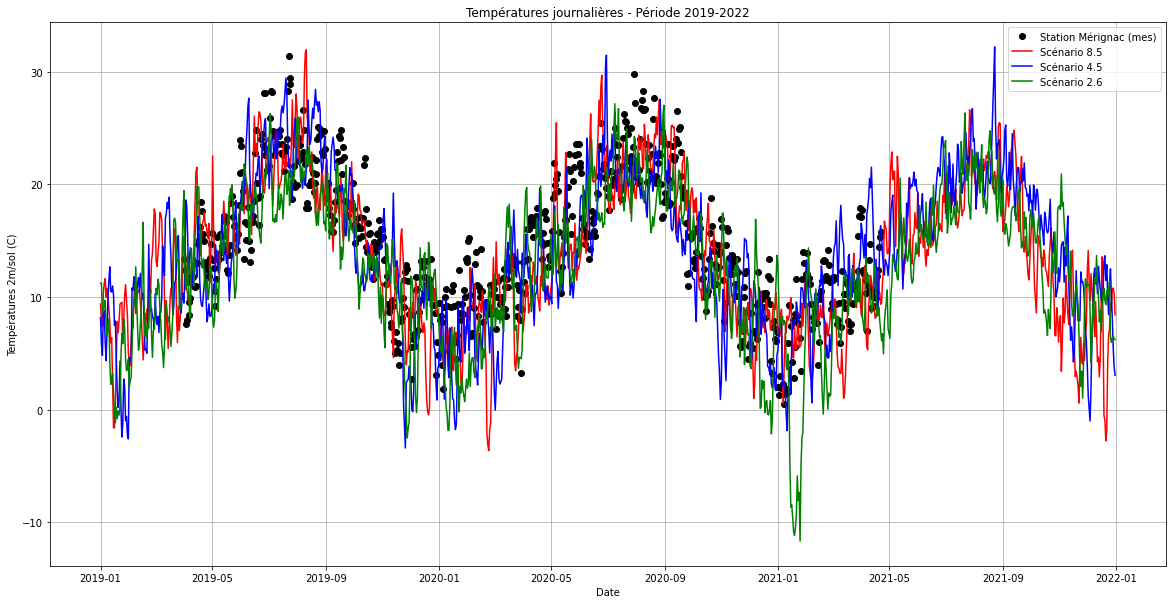

In [3]:
#représentation graphique simple données journalières obs/scénarios
#fenetre 2019-2022

fig = plt.figure(figsize=(20,10)) # Create a new figure with determined figsize parameter
plt.title('Températures journalières - Période 2019-2022')
plt.xlabel('Date')
plt.ylabel('Températures 2m/sol (C)')
plt.grid()
plt.plot(dfT['merignacT'], 'o', color = 'black', label='Station Mérignac (mes)')
plt.plot(dfT['85T'].loc['2019':'2021'], color = 'red', label='Scénario 8.5')
plt.plot(dfT['45T'].loc['2019':'2021'], color = 'blue', label='Scénario 4.5')
plt.plot(dfT['26T'].loc['2019':'2021'], color = 'green', label='Scénario 2.6')
plt.legend()
plt.show()



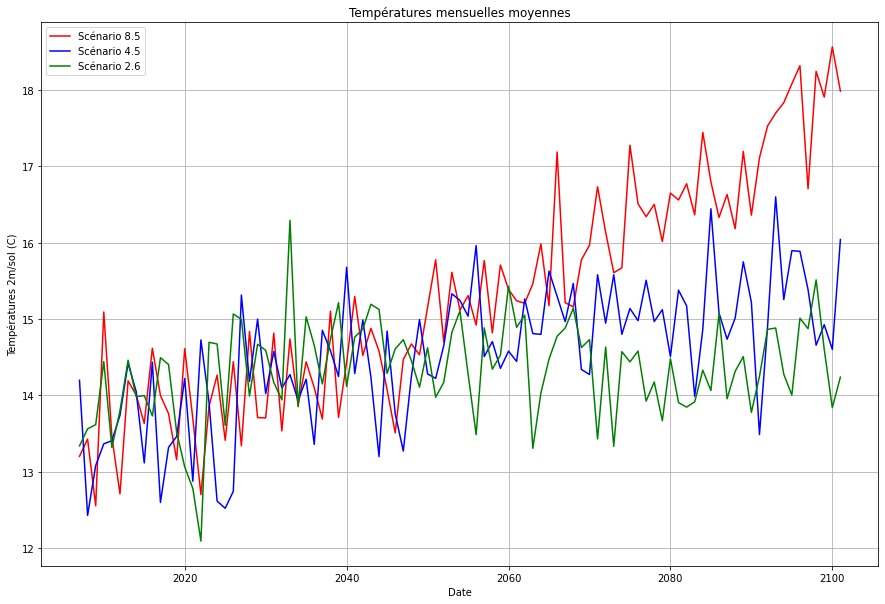

In [4]:
#représentation graphique simple scénarios tendanciels
#reechantillonnage mensuel moyen

fig = plt.figure(figsize= (15,10)) # Create a new figure with determined figsize parameter
plt.title('Températures mensuelles moyennes')
plt.xlabel('Date')
plt.ylabel('Températures 2m/sol (C)')
plt.grid()
#plt.plot(dfT['merignacT'], 'o', color = 'black', label='Station Mérignac (mes)')
plt.plot(dfT['85T'].resample('Y').mean(), color = 'red', label='Scénario 8.5')
plt.plot(dfT['45T'].resample('Y').mean(), color = 'blue', label='Scénario 4.5')
plt.plot(dfT['26T'].resample('Y').mean(), color = 'green', label='Scénario 2.6')
plt.legend()
plt.show()


### Représentation graphique avec la bibliothèque Seaborn

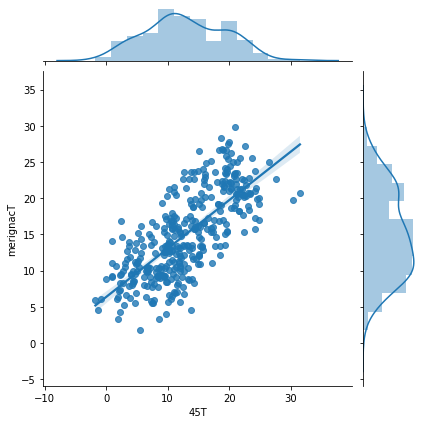

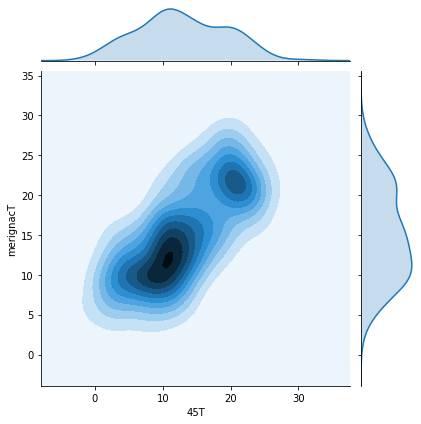

In [2]:
sns.jointplot("45T", "merignacT", data=dfT.loc['2020'], kind='reg')
plt.show()
sns.jointplot("45T", "merignacT", data=dfT.loc['2020'], kind='kde')
plt.show()

### Représentation températures annuelle moyenne +/- températures extrèmes


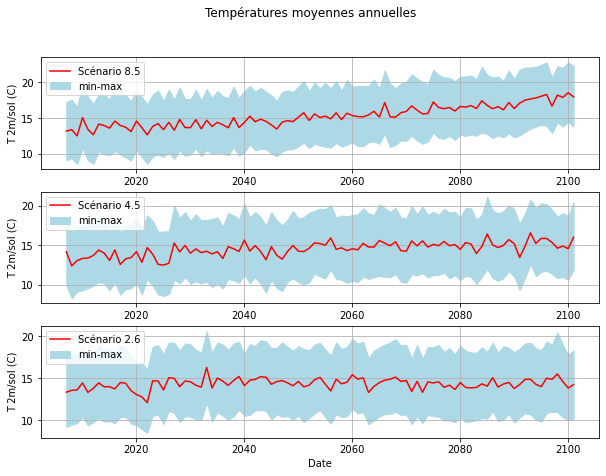

In [4]:
fig, axs = plt.subplots(3,figsize=(10,7))
fig.suptitle('Températures moyennes annuelles')
axs[0].plot(dfT['85T'].resample('Y').mean(), color = 'red', label='Scénario 8.5')
axs[0].fill_between(dfT['85T'].resample('Y').mean().index,dfT['85Tmax'].resample('Y').mean(),
                 dfT['85Tmin'].resample('Y').mean(),color='lightblue',label='min-max')
axs[0].legend()
axs[0].grid()
axs[0].set_ylabel('T 2m/sol (C)')

axs[1].plot(dfT['45T'].resample('Y').mean(), color = 'red', label='Scénario 4.5')
axs[1].fill_between(dfT['45T'].resample('Y').mean().index,dfT['45Tmax'].resample('Y').mean(),
                 dfT['45Tmin'].resample('Y').mean(),color='lightblue',label='min-max')
axs[1].legend(loc='upper left')
axs[1].grid()
axs[1].set_ylabel('T 2m/sol (C)')

axs[2].plot(dfT['26T'].resample('Y').mean(), color = 'red', label='Scénario 2.6')
axs[2].fill_between(dfT['26T'].resample('Y').mean().index,dfT['26Tmax'].resample('Y').mean(),
                 dfT['26Tmin'].resample('Y').mean(),color='lightblue',label='min-max')
axs[2].legend(loc='upper left')
axs[2].grid()
axs[2].set_ylabel('T 2m/sol (C)')

axs[2].set_xlabel('Date')
fig.show()

In [29]:
dfT.dtypes

85T          float64
85Tmax       float64
85Tmin       float64
45T          float64
45Tmax       float64
45Tmin       float64
26T          float64
26Tmax       float64
26Tmin       float64
refT          object
merignacT    float64
dtype: object

### Ajustement d'un modèle polynomial aux températures annuelles moyennes


range(0, 95)
[5.77600254e-07 2.56199020e-04 1.96712247e-02 1.35018976e+01]


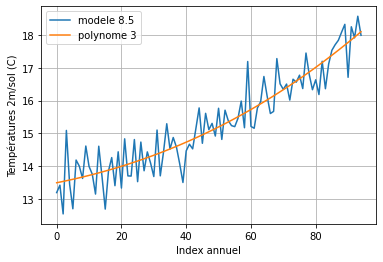

           3             2
5.776e-07 x + 0.0002562 x + 0.01967 x + 13.5
5.78e-07 2.56e-04 1.97e-02 1.35e+01


In [4]:
xaxis = range(len(dfT.resample('Y').mean().index))
print(xaxis)
ydat = dfT['85T'].resample('Y').mean()
coef = np.polyfit(xaxis,ydat,3)
print(coef)

f = np.poly1d(coef)

fig, ax = plt.subplots()
plt.plot(xaxis, ydat)
plt.plot(xaxis,f(xaxis))
ax.legend(['modele 8.5','polynome 3'])
plt.xlabel('Index annuel')
plt.ylabel('Températures 2m/sol (C)')
plt.grid()
plt.show()

print(f)
print('{:.2e}'.format(f[3]),'{:.2e}'.format(f[2]),'{:.2e}'.format(f[1]),'{:.2e}'.format(f[0]))


[  1.           3.02040816   5.04081633   7.06122449   9.08163265
  11.10204082  13.12244898  15.14285714  17.16326531  19.18367347
  21.20408163  23.2244898   25.24489796  27.26530612  29.28571429
  31.30612245  33.32653061  35.34693878  37.36734694  39.3877551
  41.40816327  43.42857143  45.44897959  47.46938776  49.48979592
  51.51020408  53.53061224  55.55102041  57.57142857  59.59183673
  61.6122449   63.63265306  65.65306122  67.67346939  69.69387755
  71.71428571  73.73469388  75.75510204  77.7755102   79.79591837
  81.81632653  83.83673469  85.85714286  87.87755102  89.89795918
  91.91836735  93.93877551  95.95918367  97.97959184 100.        ]
[13.52182555 13.56366586 13.60764054 13.65377816 13.7021073  13.75265656
 13.80545451 13.86052973 13.91791081 13.97762633 14.03970486 14.104175
 14.17106533 14.24040442 14.31222087 14.38654324 14.46340013 14.54282011
 14.62483178 14.7094637  14.79674447 14.88670266 14.97936686 15.07476565
 15.17292761 15.27388133 15.37765538 15.48427835 1

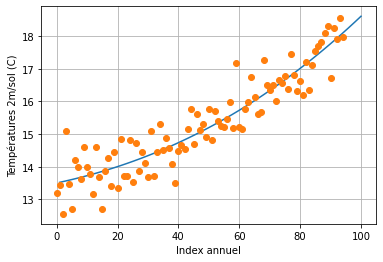

<function matplotlib.pyplot.show(*args, **kw)>

In [5]:
#test du polynome
xaxis = range(len(dfT.resample('Y').mean().index))
ydat = dfT['85T'].resample('Y').mean()

t = np.linspace(1,100)
Tcalc = f[3]*t*t*t + f[2]*t*t + f[1]*t + f[0]

print(t)
print(Tcalc)
plt.plot(t,Tcalc,xaxis,ydat,'o')
plt.xlabel('Index annuel')
plt.ylabel('Températures 2m/sol (C)')
plt.grid()
plt.show()
plt.show


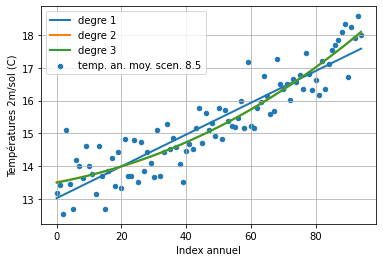

In [6]:
#Test de plusieurs modèles d'ajustement en routine

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = np.array(range(len(dfT.resample('Y').mean().index))).reshape(-1,1)
y = dfT['85T'].resample('Y').mean()
models = []
for count, degree in enumerate([1, 2, 3]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.001))
    model.fit(X, y)
    models.append(model)
    y_pred = model.predict(X)
    plt.plot(X, y_pred, linewidth=2, label='degre %d' % degree)
plt.scatter(X, y, s=20, marker='o', label='temp. an. moy. scen. 8.5')
plt.legend(loc='upper left')
plt.xlabel('Index annuel')
plt.ylabel('Températures 2m/sol (C)')
plt.grid()
plt.show()
plt.show
plt.show()


 ## Export de données format .csv

In [23]:
#selection des variables et mise en forme en colonne pour fichier csv

t = np.reshape(t, (-1,1))
Tcalc = np.reshape(Tcalc, (-1,1))

export = np.concatenate((t,Tcalc),axis =1)
np.savetxt("export_modele.csv", export, delimiter=",")
